In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gdp_df = pd.read_csv(r"C:\Users\Brian\OneDrive\Desktop\DA12\projects\Python\un-python-GartonBrian\data\gdp_percapita.csv")


In [3]:
#tricorder tings. whats goin on over 'er 
print(gdp_df.info())
print(gdp_df.head())
print(gdp_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None
  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
              Year          Value  Value Footnotes
count  7662.000000    7662.000000              0.0
mean   2006.388280   17206.979219              NaN
std       9.418727   19363.258695              NaN
min    1990.000000   

5 How many rows and columns are in `gdp_df`? What are the data types of each column?
rows:7662 columns:4 object int64  float64float64

rows:7662 columns:4 object int64  float64float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [7]:
# drop footnotes 
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

#rename columns
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']


7.  How many countries have data for all years?  Which countries are missing many years of data?  Look at the number of observations per year.  What do you notice? 

In [9]:

# Check how many unique years are in the dataset to know the maximum possible count
total_years = gdp_df['Year'].nunique()

# Group by 'Country' and count the number of entries for each country
country_year_count = gdp_df.groupby('Country').count()['Year']

# Determine countries with data for all years
countries_all_years = country_year_count[country_year_count == total_years]

# Print countries with complete data
print("Countries with data for all years:")
print(countries_all_years)

# Determine countries with many missing years of data
# Ima guess 'many' is more than half the years missing or to use a technical term "a bunch"
threshold_years = total_years / 2
countries_missing_many_years = country_year_count[country_year_count < threshold_years]

# Print countries missing many years of data
print("Countries missing many years of data:")
print(countries_missing_many_years)

# Inspect the number of observations per year to see overall data availability trends
observations_per_year = gdp_df.groupby('Year').count()['Country']
print("Observations per year:")
print(observations_per_year)



Countries with data for all years:
Country
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Angola                         33
                               ..
Vanuatu                        33
Viet Nam                       33
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 202, dtype: int64
Countries missing many years of data:
Country
Cayman Islands               16
Djibouti                     10
Kosovo                       15
Sint Maarten (Dutch part)    14
Somalia                      10
Turks and Caicos Islands     12
Name: Year, dtype: int64
Observations per year:
Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
20

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

There are many more poorer nations than there are richer ones. The box plot particularlly points our the number of richer nations while the histogram points out at what gdp these nations have.

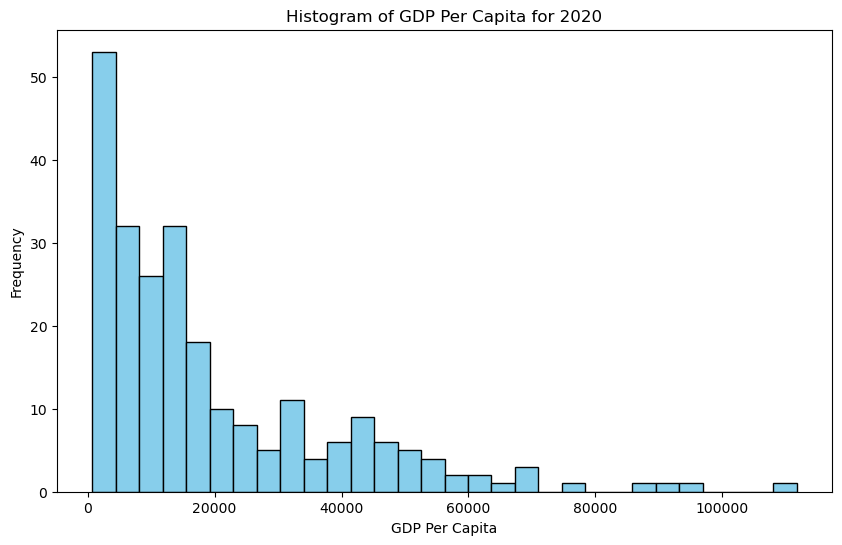

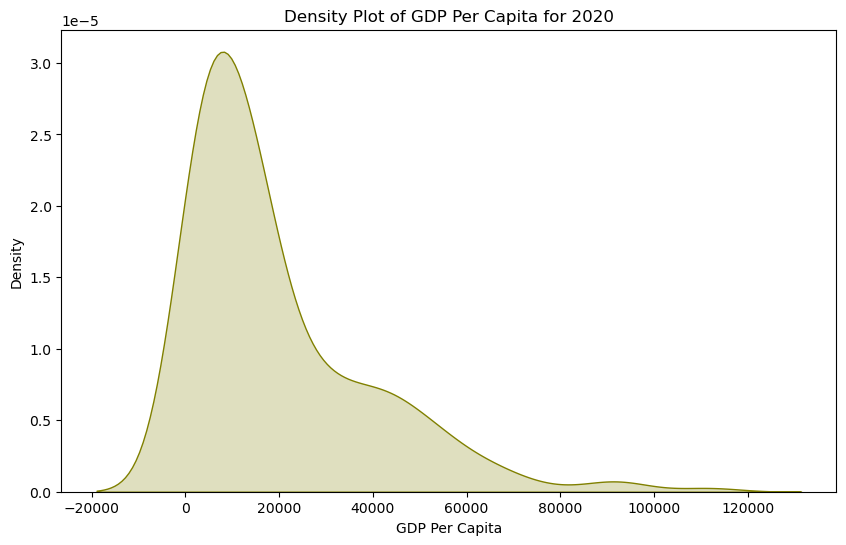

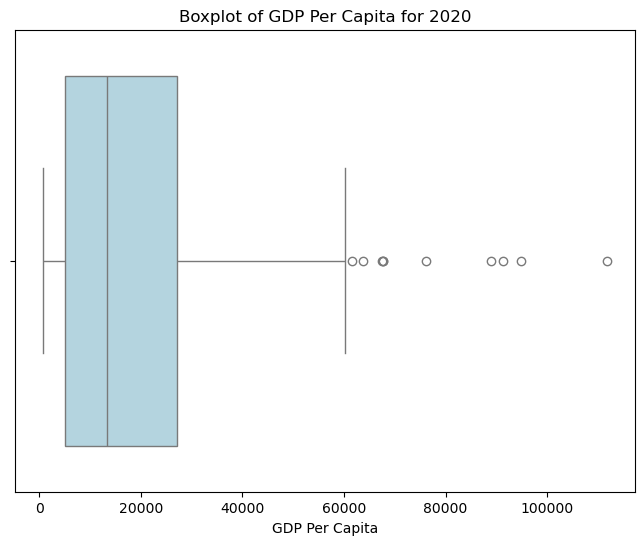

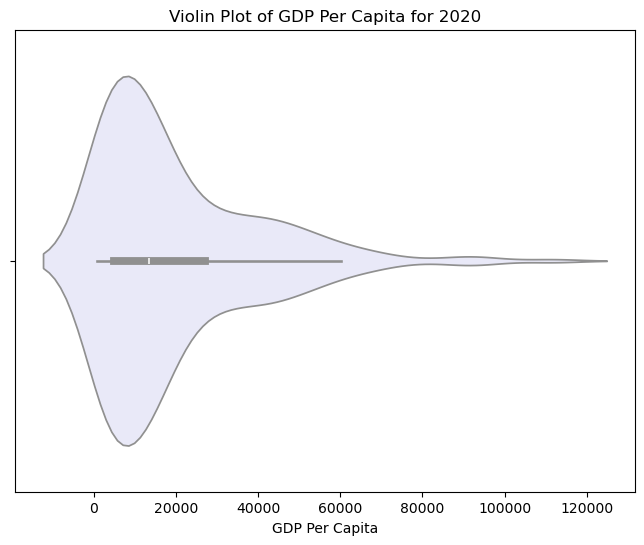

In [11]:
#Lets just look at 2020
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
#Histogram. Um what about Her-stagram? Theystagram?
plt.figure(figsize=(10, 6))
plt.hist(gdp_2020['GDP_Per_Capita'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of GDP Per Capita for 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.show()
# Now its time for doctor evil's 3 evil plots mauhahah
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True, color='olive')
plt.title('Density Plot of GDP Per Capita for 2020')
plt.xlabel('GDP Per Capita')
plt.show()
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=gdp_2020['GDP_Per_Capita'], color='lightblue')
plt.title('Boxplot of GDP Per Capita for 2020')
plt.xlabel('GDP Per Capita')
plt.show()
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=gdp_2020['GDP_Per_Capita'], color='lavender')
plt.title('Violin Plot of GDP Per Capita for 2020')
plt.xlabel('GDP Per Capita')
plt.show()


9. What was the median GDP per capita value in 2020?

In [13]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
print("The median GDP per capita in 2020 is:", median_gdp_2020)

The median GDP per capita in 2020 is: 13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [15]:
# looking at just the decades requested
years_of_interest = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years_of_interest)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


Shows us rectangles of the majority, the brackets of the important minorities, and the outliers


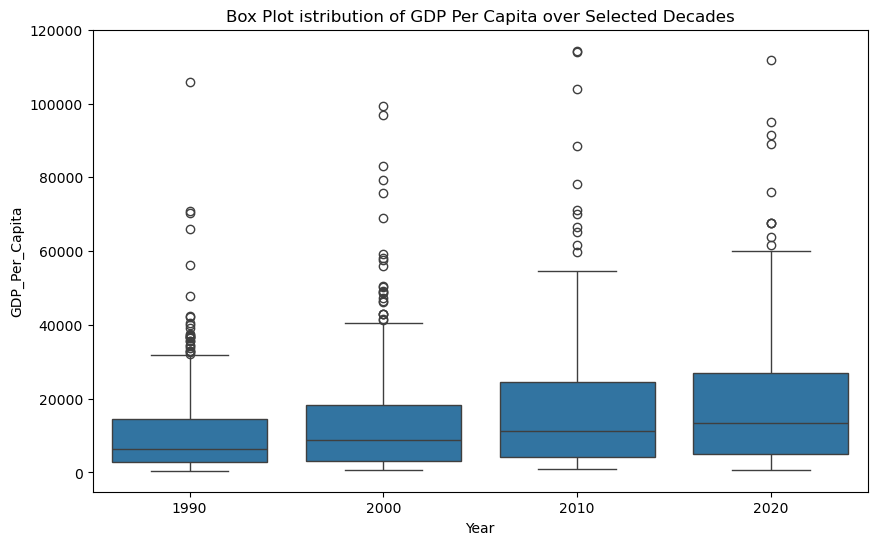

Shows us Just the majority's stats


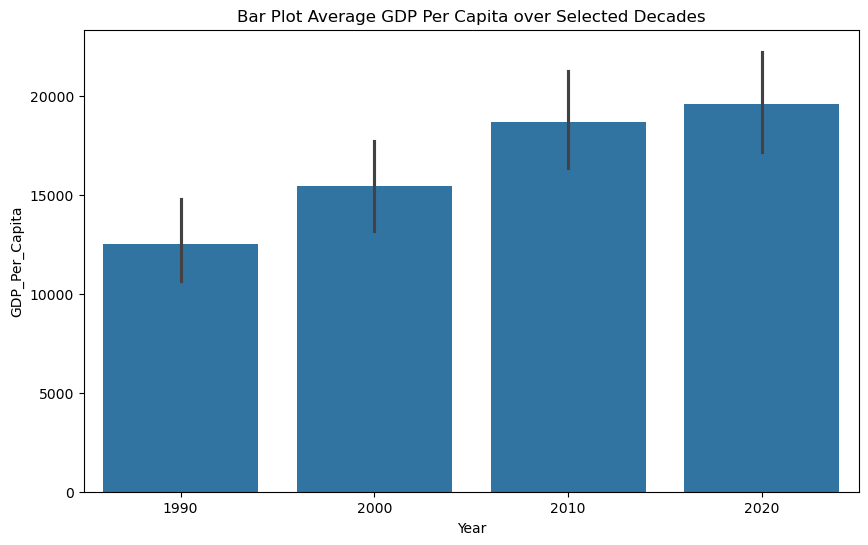

Shows us similar informaiotn but better lays out clusters of data points


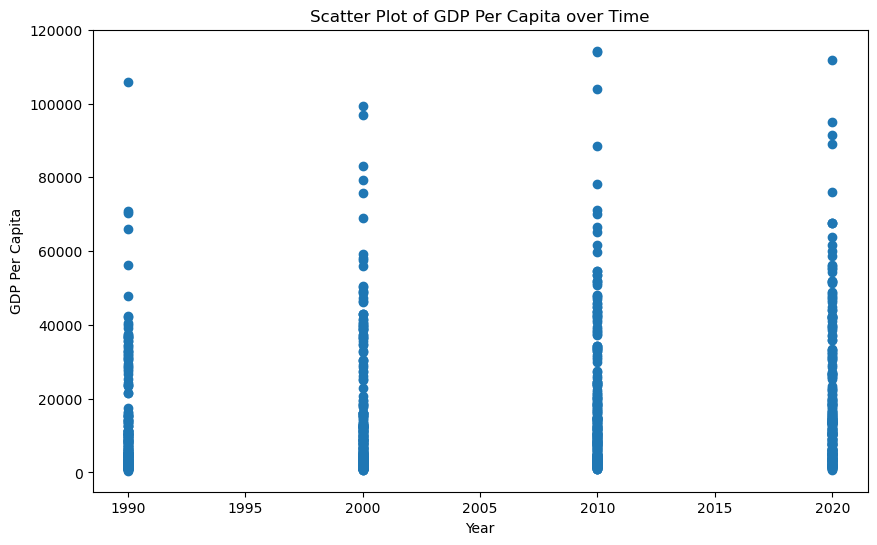

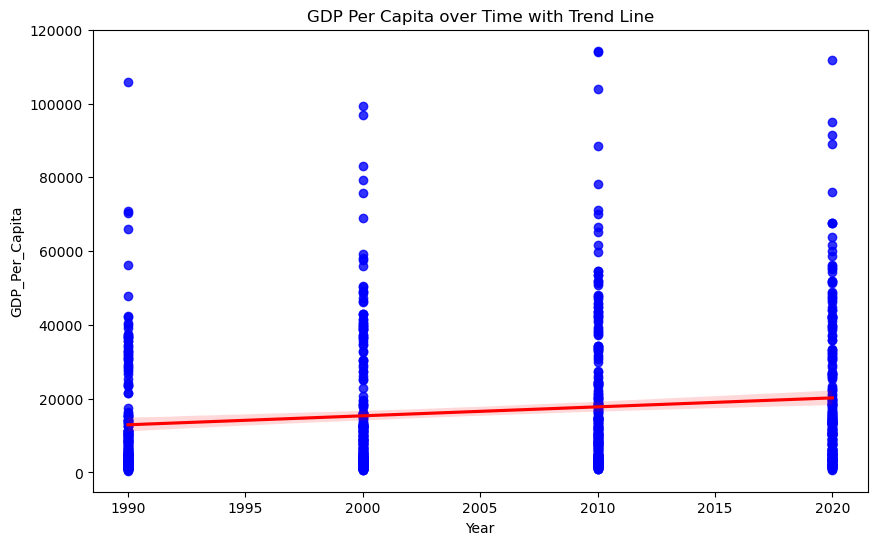

Shows the same as above but better dipects overal trends that are harder to see in the scatter plot


In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('Box Plot istribution of GDP Per Capita over Selected Decades')
print("Shows us rectangles of the majority, the brackets of the important minorities, and the outliers")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('Bar Plot Average GDP Per Capita over Selected Decades')
print("Shows us Just the majority's stats")
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(gdp_decades['Year'], gdp_decades['GDP_Per_Capita'])
plt.title('Scatter Plot of GDP Per Capita over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
print("Shows us similar informaiotn but better lays out clusters of data points")

plt.show()
plt.figure(figsize=(10, 6))
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('GDP Per Capita over Time with Trend Line')
plt.show()
print("Shows the same as above but better dipects overal trends that are harder to see in the scatter plot")


11. Which country was the first to have a GDP per capita greater than $100,000?

In [18]:
# Filter for rows where GDP_Per_Capita is greater than 100,000
high_gdp_df = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

# Sort by Year to find the earliest instance
sorted_high_gdp_df = high_gdp_df.sort_values(by='Year')

# Get the first row
first_high_gdp_country = sorted_high_gdp_df.iloc[0]

# Print the country and year
print({first_high_gdp_country['Country']} ,{first_high_gdp_country['Year']})


{'United Arab Emirates'} {1990}


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

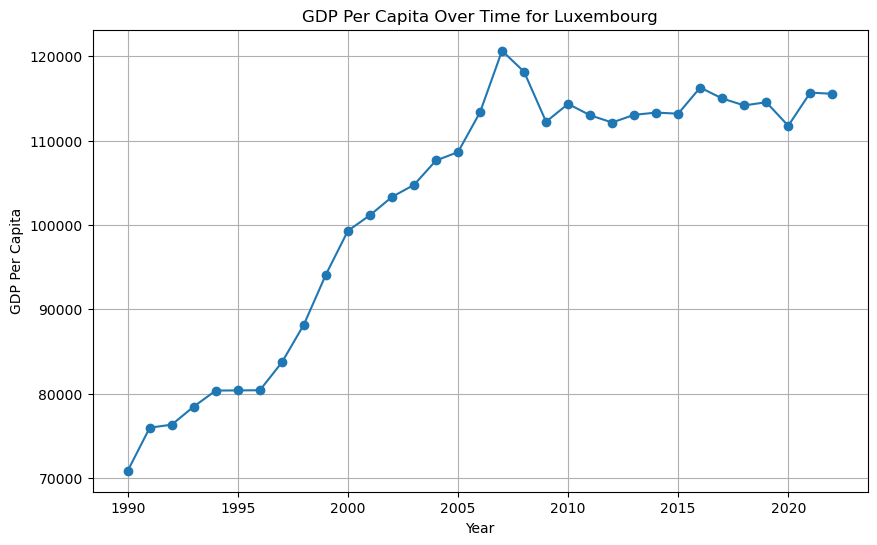

In [20]:
# Step 1: Filter for 2020
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

# Step 2: highest GDP per capita in 2020
highest_gdp_country_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]['Country']

# Step 3: Extract the data for this country across all years
highest_gdp_country_data = gdp_df[gdp_df['Country'] == highest_gdp_country_2020]

# Step 4: Plot the GDP per capita of this country over the years
plt.figure(figsize=(10, 6))
plt.plot(highest_gdp_country_data['Year'], highest_gdp_country_data['GDP_Per_Capita'], marker='o')
plt.title(f'GDP Per Capita Over Time for {highest_gdp_country_2020}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.show()


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

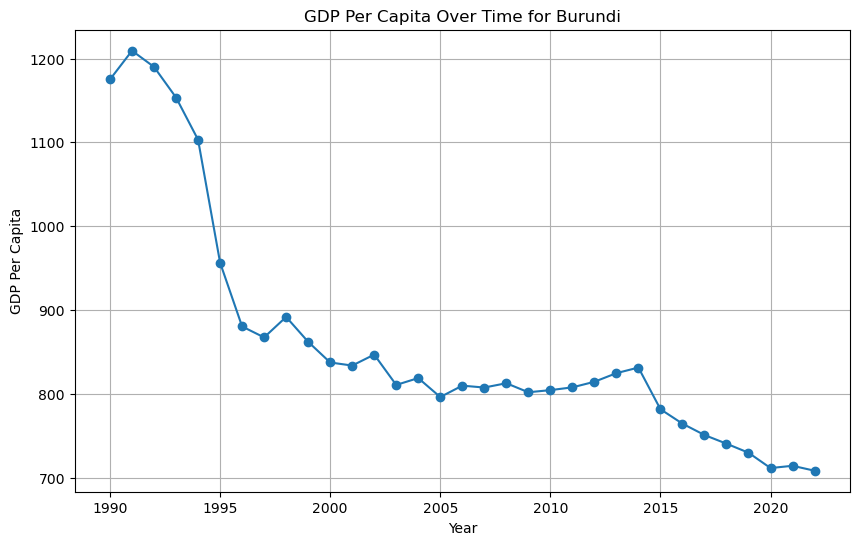

The country with the lowest GDP per capita in 2020 is Burundi.


In [87]:
# Find the country with the lowest GDP per capita in 2020
lowest_gdp_2020 = gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')
lowest_gdp_country_2020 = lowest_gdp_2020.iloc[0]['Country']

# Filter the data for this country
lowest_gdp_country_data = gdp_df[gdp_df['Country'] == lowest_gdp_country_2020]

# Plot the GDP per capita over time for this country
plt.figure(figsize=(10, 6))
plt.plot(lowest_gdp_country_data['Year'], lowest_gdp_country_data['GDP_Per_Capita'], marker='o')
plt.title(f'GDP Per Capita Over Time for {lowest_gdp_country_2020}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.show()

# Display the country with the lowest GDP per capita in 2020
print(f'The country with the lowest GDP per capita in 2020 is {lowest_gdp_country_2020}.')


In [89]:
# Filter the data for the years 1990 and 2020
gdp_1990 = gdp_df[gdp_df['Year'] == 1990]
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

# Merge the two DataFrames on 'Country'
gdp_comparison = gdp_1990[['Country', 'GDP_Per_Capita']].merge(gdp_2020[['Country', 'GDP_Per_Capita']], on='Country', suffixes=('_1990', '_2020'))

# Add a column to check if GDP in 2020 is higher than in 1990
gdp_comparison['Higher_in_2020'] = gdp_comparison['GDP_Per_Capita_2020'] > gdp_comparison['GDP_Per_Capita_1990']

# Find the countries with a lower GDP per capita in 2020 than in 1990
lower_gdp_countries = gdp_comparison[gdp_comparison['Higher_in_2020'] == False]

# Display the results
print(f'Total number of countries with higher GDP per capita in 2020 than in 1990: {gdp_comparison["Higher_in_2020"].sum()}')
print(f'Total number of countries with lower GDP per capita in 2020 than in 1990: {len(lower_gdp_countries)}')
print('Countries with lower GDP per capita in 2020 than in 1990:')
print(lower_gdp_countries[['Country', 'GDP_Per_Capita_1990', 'GDP_Per_Capita_2020']])


Total number of countries with higher GDP per capita in 2020 than in 1990: 188
Total number of countries with lower GDP per capita in 2020 than in 1990: 19
Countries with lower GDP per capita in 2020 than in 1990:
                                      Country  GDP_Per_Capita_1990  \
15                                   Barbados         14097.395550   
25                                     Brunei         70358.724094   
28                                    Burundi          1175.155086   
34                   Central African Republic          1200.613390   
41                                      Congo          5007.319245   
45                            Dem. Rep. Congo          1750.169739   
66   Fragile and conflict affected situations          4864.814075   
68                                      Gabon         17559.006114   
76                              Guinea-Bissau          1998.173206   
78                                      Haiti          3612.815105   
99              

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [24]:
internet_df = pd.read_csv(r"C:\Users\Brian\OneDrive\Desktop\DA12\projects\Python\un-python-GartonBrian\data\internet_use.csv",nrows=6083)

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [26]:
# drop footnotes 
internet_df = internet_df.drop(columns=['Value Footnotes'])

#rename columns
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

#tricorder tings. whats goin on over 'er 
print(internet_df.info())
print(internet_df.head())
print(internet_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6082 entries, 0 to 6081
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6082 non-null   object 
 1   Year                6082 non-null   int64  
 2   Internet_Users_Pct  6082 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB
None
       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26
              Year  Internet_Users_Pct
count  6082.000000         6082.000000
mean   2007.209964           29.660464
std       8.814547           31.381747
min    1990.000000            0.000000
25%    2000.000000            1.497465
50%    2007.000000           16.569450
75%    2015.000000           55.670675
max    2023.000000    

16. Look at the number of observations in this dataset per year. What do you notice?

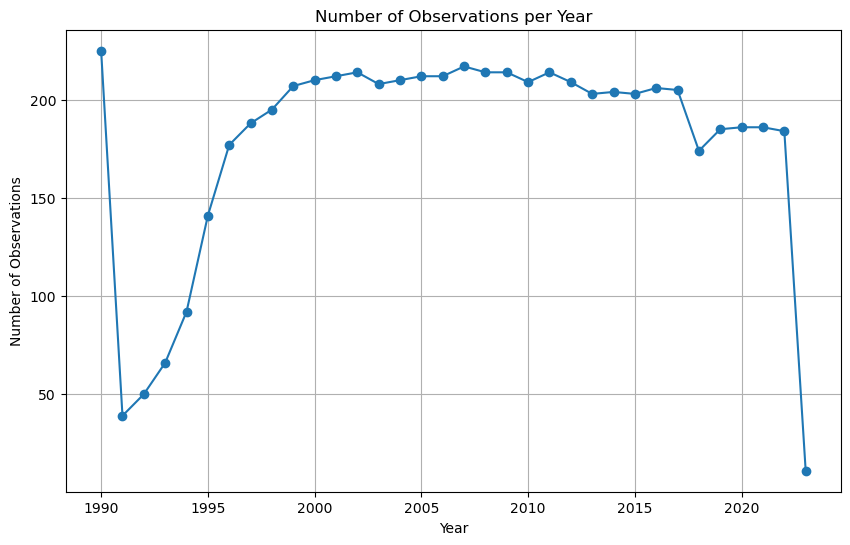

The number of OpY is roughly equal to the number of UN member states. Perhaps as this motion was ratified all the states gave their informiaton but were redicent to actually interact in the years afterwards.


In [28]:
# Group the data by 'Year' and count the number of observations for each year
observations_per_year = internet_df.groupby('Year').size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(observations_per_year.index, observations_per_year.values, marker='o', linestyle='-')
plt.title('Number of Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

print("The number of OpY is roughly equal to the number of UN member states. Perhaps as this motion was ratified all the states gave their informiaton but were redicent to actually interact in the years afterwards.")

17. What is the first year to have a non-zero internet users percentage value?

In [30]:
# Find the first year with a non-zero internet users percentage
first_non_zero_year = internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

print(f"The first year to have a non-zero internet users percentage value is: {first_non_zero_year}")


The first year to have a non-zero internet users percentage value is: 1990


18. How does the distribution of internet users percent differ for 2000 and 2014?

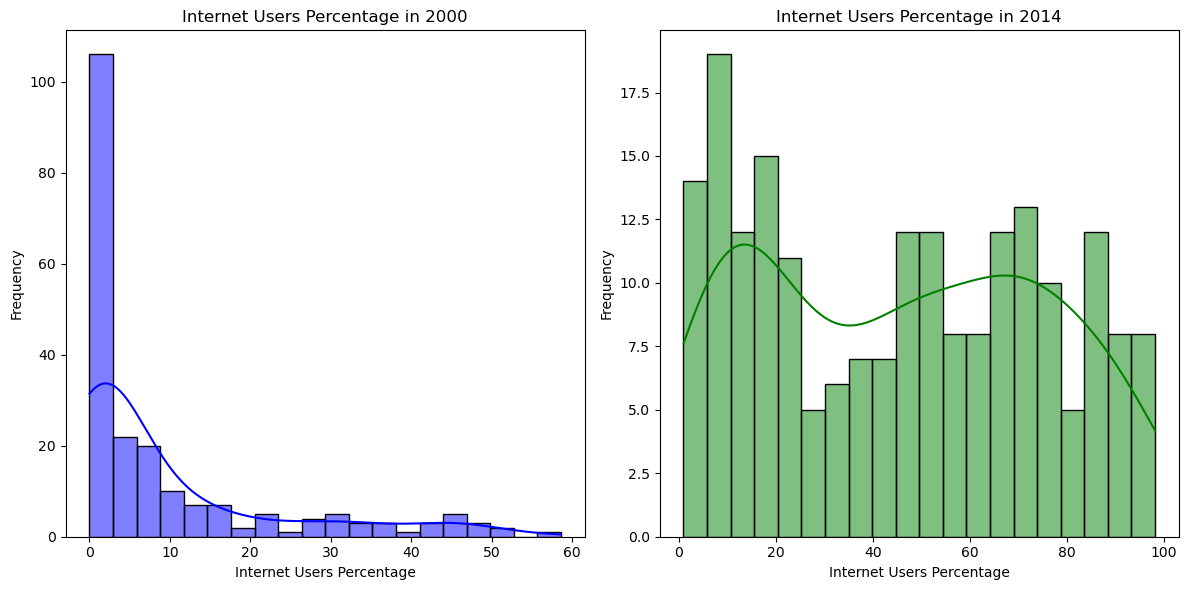

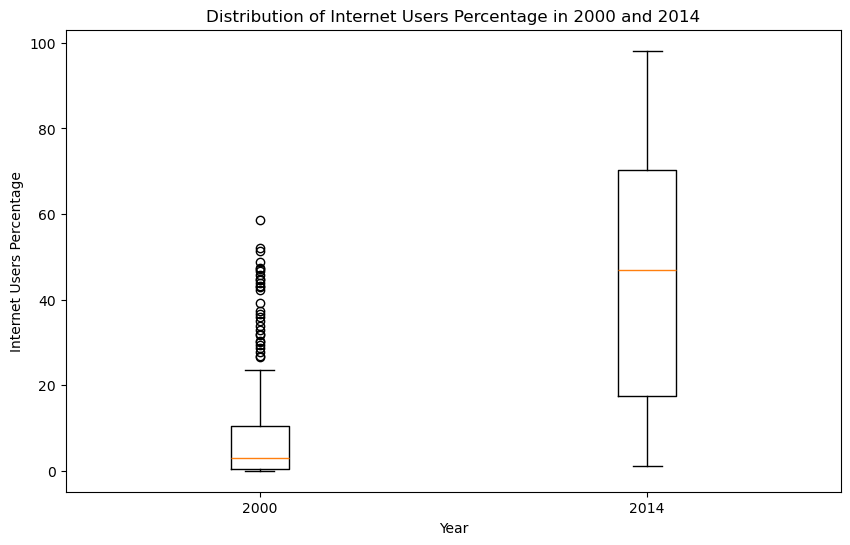

Gennerally in 2000 for most contries it was weird to have internet even if 50 percent of your people had it. In 2014 on average half the population of any country has internet.


In [83]:
# Filter the data for the years 2000 and 2014
internet_2000 = internet_df[internet_df['Year'] == 2000]['Internet_Users_Pct']
internet_2014 = internet_df[internet_df['Year'] == 2014]['Internet_Users_Pct']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(internet_2000, kde=True, bins=20, color='blue')
plt.title('Internet Users Percentage in 2000')
plt.xlabel('Internet Users Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(internet_2014, kde=True, bins=20, color='green')
plt.title('Internet Users Percentage in 2014')
plt.xlabel('Internet Users Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(10, 6))

data_to_plot = [internet_2000, internet_2014]
plt.boxplot(data_to_plot, labels=['2000', '2014'])

plt.title('Distribution of Internet Users Percentage in 2000 and 2014')
plt.xlabel('Year')
plt.ylabel('Internet Users Percentage')

plt.show()

print("Gennerally in 2000 for most contries it was weird to have internet even if 50 percent of your people had it. In 2014 on average half the population, skewing lower, of any country has internet.")

19. For how many countries was the percentage of internet users below 5% in 2014?

In [34]:
# Filter the data for the year 2014
internet_2014 = internet_df[internet_df['Year'] == 2014]

# Filter for countries with internet users percentage below 5%
countries_below_5pct_2014 = internet_2014[internet_2014['Internet_Users_Pct'] < 5]

# Count the number of countries
num_countries_below_5pct_2014 = countries_below_5pct_2014['Country'].nunique()

print(f'Number of countries with internet users percentage below 5% in 2014: {num_countries_below_5pct_2014}')


Number of countries with internet users percentage below 5% in 2014: 10


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [36]:
# Merge the two DataFrames
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

#tricorder tings. whats goin on over 'er 
print(gdp_and_internet_use.info())
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             9112 non-null   object 
 1   Year                9112 non-null   int64  
 2   GDP_Per_Capita      7662 non-null   float64
 3   Internet_Users_Pct  6082 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 284.9+ KB
None
       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  1990             NaN            0.000000
1  Afghanistan  2001             NaN            0.004723
2  Afghanistan  2002     1280.463171            0.004561
3  Afghanistan  2003     1292.333437            0.087891
4  Afghanistan  2004     1260.060581            0.105809
              Year  GDP_Per_Capita  Internet_Users_Pct
count  9112.000000     7662.000000         6082.000000
mean   2006.332529    17206.979219           29.660464
std       9.323857    19

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [38]:
# Filter the DataFrame for the year 2014
data_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

# Drop rows where 'GDP_Per_Capita' is NaN
data_2014_noNaN = data_2014.dropna(subset=['GDP_Per_Capita'])

# Sort the DataFrame by Internet Users Percentage in descending order
top_internet_users_2014 = data_2014_noNaN.sort_values(by='Internet_Users_Pct', ascending=False).head(3)

# Extract the top three countries
top_countries = top_internet_users_2014['Country'].tolist()
print(f"The top three countries with the highest internet users percentage in 2014 are: {top_countries}")


The top three countries with the highest internet users percentage in 2014 are: ['Iceland', 'Bermuda', 'Norway']


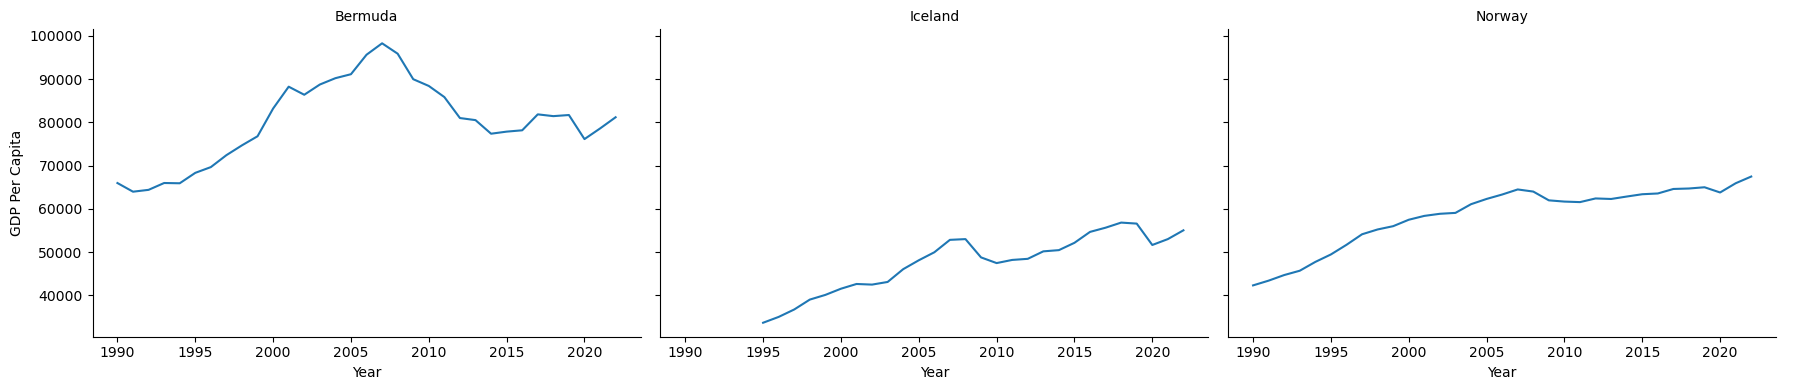

Caveat: A country was removed from the list of 2014 countries. The Falkland Islands are a terriroty of the UK and thus would *share* its GDP for the purposes of our study here unduely. They also have a NaN in their GDP seciton I assume for this reason. Thus Norway is here
For most nations there are 2 increases in GDP around 2006 and 2017. Assuming the fact that the larger increases happen in island nations and we are talking about internet percentage use, one might think that this may have to do with undersea cables or satilite internet.Obviously this could also have to do with the housing boom and bust around that time


In [79]:
# Filter the DataFrame for the top three countries
top_countries_data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_countries)]

# Create a Seaborn FacetGrid to compare GDP per capita over time
g = sns.FacetGrid(top_countries_data, col='Country', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "GDP Per Capita")
g.add_legend()

plt.show()
print("Caveat: A country was removed from the list of 2014 countries. The Falkland Islands are a terriroty of the UK and thus would *share* its GDP for the purposes of our study here unduely. They also have a NaN in their GDP seciton I assume for this reason. Thus Norway is here")
print("For most nations there are 2 increases in GDP around 2006 and 2017. Assuming the fact that the larger increases happen in island nations and we are talking about internet percentage use, one might think that this may have to do with undersea cables or satilite internet.Obviously this could also have to do with the housing boom and bust around that time")


In [40]:
# Check for missing data in the top three countries' GDP per capita after correcting for the falkland islands
missing_gdp_data = top_countries_data[top_countries_data['GDP_Per_Capita'].isna()]
print("Missing GDP Per Capita data for these entries:")
print(missing_gdp_data)


Missing GDP Per Capita data for these entries:
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
3796  Iceland  1990             NaN            0.000000
3797  Iceland  1991             NaN            0.505129
3798  Iceland  1992             NaN            1.539160
3799  Iceland  1993             NaN            2.667830
3800  Iceland  1994             NaN            6.794810


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [42]:
gdp_and_internet_use_2014= gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

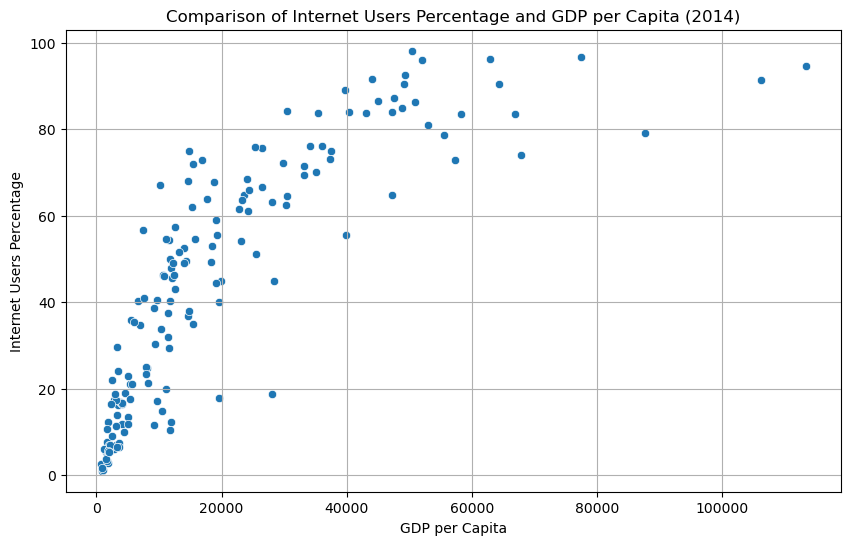

In [81]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_Per_Capita', y='Internet_Users_Pct', data=data_2014_noNaN)
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users Percentage')
plt.title('Comparison of Internet Users Percentage and GDP per Capita (2014)')
plt.grid(True)
plt.show()

print("I am not seeing a huge pattern or outlier. This may be because of the removal of the falkland islands")

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
